In [1]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt

In [2]:
foods = pd.read_csv('../data/foodb_2017_06_29_csv/foods.csv',encoding='ANSI')
foods = foods.rename(columns={'name':'food_name'})

In [3]:
contents_orig = pd.read_csv('../data/foodb_2017_06_29_csv/contents.csv',encoding='ANSI',error_bad_lines=False)
contents_keep_cols = ['orig_food_common_name','orig_food_id','orig_source_id','orig_source_name','source_type','standard_content']
contents = contents_orig[contents_keep_cols]
contents = contents.rename(columns={'orig_food_common_name':'food_name','orig_source_name':'chem_name'})

b'Skipping line 2781: expected 24 fields, saw 26\nSkipping line 3227: expected 24 fields, saw 25\nSkipping line 3228: expected 24 fields, saw 25\nSkipping line 3229: expected 24 fields, saw 25\nSkipping line 3232: expected 24 fields, saw 26\nSkipping line 3235: expected 24 fields, saw 26\nSkipping line 3236: expected 24 fields, saw 26\nSkipping line 3237: expected 24 fields, saw 25\nSkipping line 4241: expected 24 fields, saw 26\nSkipping line 4242: expected 24 fields, saw 26\nSkipping line 4243: expected 24 fields, saw 26\nSkipping line 4244: expected 24 fields, saw 26\nSkipping line 4245: expected 24 fields, saw 26\nSkipping line 4246: expected 24 fields, saw 26\nSkipping line 4247: expected 24 fields, saw 26\nSkipping line 4248: expected 24 fields, saw 27\nSkipping line 4249: expected 24 fields, saw 26\nSkipping line 4250: expected 24 fields, saw 27\nSkipping line 4251: expected 24 fields, saw 26\nSkipping line 4252: expected 24 fields, saw 27\nSkipping line 4253: expected 24 fields

b'Skipping line 39412: expected 24 fields, saw 25\nSkipping line 39413: expected 24 fields, saw 25\nSkipping line 39414: expected 24 fields, saw 25\nSkipping line 39415: expected 24 fields, saw 25\nSkipping line 39416: expected 24 fields, saw 26\nSkipping line 39844: expected 24 fields, saw 25\nSkipping line 39845: expected 24 fields, saw 25\nSkipping line 39846: expected 24 fields, saw 25\nSkipping line 39849: expected 24 fields, saw 26\nSkipping line 39852: expected 24 fields, saw 26\nSkipping line 39853: expected 24 fields, saw 26\nSkipping line 39854: expected 24 fields, saw 25\nSkipping line 40059: expected 24 fields, saw 25\nSkipping line 40060: expected 24 fields, saw 25\nSkipping line 40061: expected 24 fields, saw 25\nSkipping line 40062: expected 24 fields, saw 25\nSkipping line 40065: expected 24 fields, saw 25\nSkipping line 40066: expected 24 fields, saw 26\nSkipping line 40067: expected 24 fields, saw 25\nSkipping line 40068: expected 24 fields, saw 26\nSkipping line 4006

b'Skipping line 76292: expected 24 fields, saw 26\nSkipping line 76933: expected 24 fields, saw 26\nSkipping line 76934: expected 24 fields, saw 26\nSkipping line 76935: expected 24 fields, saw 26\nSkipping line 76936: expected 24 fields, saw 27\nSkipping line 76937: expected 24 fields, saw 27\nSkipping line 76938: expected 24 fields, saw 27\nSkipping line 76939: expected 24 fields, saw 27\nSkipping line 76940: expected 24 fields, saw 27\nSkipping line 76941: expected 24 fields, saw 27\nSkipping line 76942: expected 24 fields, saw 27\nSkipping line 76943: expected 24 fields, saw 27\nSkipping line 76944: expected 24 fields, saw 26\nSkipping line 76945: expected 24 fields, saw 27\nSkipping line 76946: expected 24 fields, saw 26\nSkipping line 76947: expected 24 fields, saw 27\nSkipping line 76948: expected 24 fields, saw 27\nSkipping line 76949: expected 24 fields, saw 27\nSkipping line 76950: expected 24 fields, saw 26\nSkipping line 77043: expected 24 fields, saw 27\nSkipping line 7704

b'Skipping line 115165: expected 24 fields, saw 26\nSkipping line 115166: expected 24 fields, saw 26\nSkipping line 115992: expected 24 fields, saw 25\nSkipping line 115993: expected 24 fields, saw 25\nSkipping line 115994: expected 24 fields, saw 25\nSkipping line 115995: expected 24 fields, saw 25\nSkipping line 115996: expected 24 fields, saw 25\nSkipping line 115997: expected 24 fields, saw 25\nSkipping line 116002: expected 24 fields, saw 26\nSkipping line 116003: expected 24 fields, saw 26\nSkipping line 116008: expected 24 fields, saw 26\nSkipping line 116009: expected 24 fields, saw 26\nSkipping line 116010: expected 24 fields, saw 26\nSkipping line 116011: expected 24 fields, saw 26\nSkipping line 116012: expected 24 fields, saw 25\nSkipping line 116013: expected 24 fields, saw 25\nSkipping line 117629: expected 24 fields, saw 26\nSkipping line 117630: expected 24 fields, saw 26\nSkipping line 117631: expected 24 fields, saw 26\nSkipping line 117632: expected 24 fields, saw 26

b'Skipping line 335537: expected 24 fields, saw 26\nSkipping line 335538: expected 24 fields, saw 26\nSkipping line 335539: expected 24 fields, saw 26\nSkipping line 335540: expected 24 fields, saw 26\nSkipping line 335541: expected 24 fields, saw 26\nSkipping line 335542: expected 24 fields, saw 26\nSkipping line 335543: expected 24 fields, saw 26\nSkipping line 335544: expected 24 fields, saw 26\nSkipping line 335545: expected 24 fields, saw 26\nSkipping line 335546: expected 24 fields, saw 26\nSkipping line 335547: expected 24 fields, saw 26\nSkipping line 335548: expected 24 fields, saw 26\nSkipping line 335549: expected 24 fields, saw 26\nSkipping line 335550: expected 24 fields, saw 26\nSkipping line 335551: expected 24 fields, saw 26\nSkipping line 335552: expected 24 fields, saw 26\nSkipping line 335553: expected 24 fields, saw 26\nSkipping line 335554: expected 24 fields, saw 26\nSkipping line 335555: expected 24 fields, saw 26\nSkipping line 335556: expected 24 fields, saw 26

b'Skipping line 516606: expected 24 fields, saw 26\nSkipping line 516607: expected 24 fields, saw 26\nSkipping line 516608: expected 24 fields, saw 26\nSkipping line 516609: expected 24 fields, saw 26\nSkipping line 516610: expected 24 fields, saw 26\nSkipping line 516611: expected 24 fields, saw 26\nSkipping line 516612: expected 24 fields, saw 26\nSkipping line 516613: expected 24 fields, saw 26\nSkipping line 516614: expected 24 fields, saw 26\nSkipping line 516615: expected 24 fields, saw 26\nSkipping line 516616: expected 24 fields, saw 26\nSkipping line 516617: expected 24 fields, saw 26\nSkipping line 516618: expected 24 fields, saw 26\nSkipping line 516619: expected 24 fields, saw 26\nSkipping line 516620: expected 24 fields, saw 26\nSkipping line 516621: expected 24 fields, saw 26\nSkipping line 516622: expected 24 fields, saw 26\nSkipping line 516623: expected 24 fields, saw 26\nSkipping line 516624: expected 24 fields, saw 26\nSkipping line 516625: expected 24 fields, saw 26

b'Skipping line 608198: expected 24 fields, saw 25\nSkipping line 608199: expected 24 fields, saw 25\nSkipping line 608200: expected 24 fields, saw 25\nSkipping line 608201: expected 24 fields, saw 25\nSkipping line 608202: expected 24 fields, saw 25\nSkipping line 608203: expected 24 fields, saw 25\nSkipping line 608204: expected 24 fields, saw 25\nSkipping line 608205: expected 24 fields, saw 25\nSkipping line 608206: expected 24 fields, saw 25\nSkipping line 608207: expected 24 fields, saw 25\nSkipping line 608208: expected 24 fields, saw 25\nSkipping line 608209: expected 24 fields, saw 25\nSkipping line 608210: expected 24 fields, saw 25\nSkipping line 608211: expected 24 fields, saw 25\nSkipping line 608212: expected 24 fields, saw 25\nSkipping line 608213: expected 24 fields, saw 25\nSkipping line 608214: expected 24 fields, saw 25\nSkipping line 608215: expected 24 fields, saw 25\nSkipping line 608216: expected 24 fields, saw 25\nSkipping line 608217: expected 24 fields, saw 25

b'Skipping line 693376: expected 24 fields, saw 26\n'
b'Skipping line 701902: expected 24 fields, saw 26\nSkipping line 701914: expected 24 fields, saw 26\n'
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (4,5,6,7,8,9,13,14,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


There are multiple entries for one pair of common name and source name, if a food has multiple parts (ie leaf, bulb, stem, etc.). For now just take the average

In [5]:
contents_ct = pd.crosstab(index=contents['food_name'],columns=contents['chem_name'],values=contents['standard_content'],aggfunc='mean')

In [6]:
nutrients_orig = pd.read_csv('../data/foodb_2017_06_29_csv/nutrients.csv')

In [7]:
compounds_orig = pd.read_csv('../data/foodb_2017_06_29_csv/compounds.csv',encoding='ANSI')
compounds_orig = compounds_orig.rename(columns={'name':'chem_name'})

C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (13,14,17,45,50,51,54,55,62,63,64,65,66,67,68,69,88) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
contents_orig_nutrients = contents_orig[contents_orig['source_type']=='Nutrient']
contents_orig_compounds = contents_orig[contents_orig['source_type']=='Compound']

In [9]:
class_cols = ['superklass','klass','subklass']
compounds_class = compounds_orig[['chem_name','id']+class_cols]
compounds_class = compounds_class.rename(columns={'id':'source_id'})

In [10]:
contents_orig_compounds = contents_orig_compounds.merge(compounds_class,on='source_id',how='left')

In [11]:
contents_nutrients_ct = pd.crosstab(index=contents_orig_nutrients['food_id'],columns=contents_orig_nutrients['orig_source_name'],values=contents['standard_content'],aggfunc='mean')
contents_compounds_ct = pd.crosstab(index=contents_orig_compounds['food_id'],columns=contents_orig_compounds['superklass'],values=contents['standard_content'],aggfunc='sum')

In [12]:
results = contents_nutrients_ct.merge(contents_compounds_ct,how='left',on='food_id')

 at least 10 nutrients

In [13]:
data = results.dropna(axis=0,thresh=10)

In [14]:
pca = PCA(n_components=2)
pca_results = pd.DataFrame(pca.fit_transform(data.replace(np.nan,0)),columns=['PC1','PC2'],index=data.index)

data = data.merge(pca_results,on='food_id')

In [17]:
tsne = TSNE(n_components=2)
tsne_results = pd.DataFrame(tsne.fit_transform(data.replace(np.nan,0)),columns=['ax1','ax2'],index=data.index)

data = data.merge(tsne_results,on='food_id')

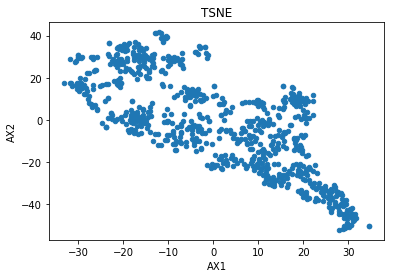

In [27]:
# foods_final = foods.rename(columns={'id':'food_id'}).merge(data,on='food_id',how='inner')
foods_final['food_group'] = pd.Categorical(foods_final['food_group'])
foods_final['food_group_cat']= foods_final.food_group.cat.codes

In [144]:
# foods_final = foods_final.loc[(foods_final['PC1'] < 0.5) & (abs(foods_final['PC2'])<1e6),:]

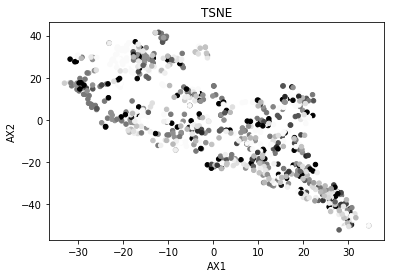

In [28]:
f, axes = plt.subplots(1, 1)
foods_final.plot.scatter('ax1','ax2',c=foods_final['food_group_cat'],ax=axes)
axes.set_xlabel('AX1')
axes.set_ylabel('AX2')
axes.set_title('TSNE')
plt.show()

In [31]:
foods_final.to_csv('../data/foods_final.csv')

In [33]:
foods_final.columns

Index(['food_id', 'food_name', 'name_scientific', 'description', 'itis_id',
       'wikipedia_id', 'wikipedia_id.1', 'picture_content_type',
       'picture_file_size', 'picture_updated_at', 'legacy_id', 'food_group',
       'food_subgroup', 'food_type', 'created_at', 'updated_at', 'creator_id',
       'updater_id', 'export_to_afcdb', 'category', 'ncbi_taxonomy_id',
       'export_to_foodb', '13:0', '14:1', '15:1', '16:1 c', '16:1 t',
       '16:1 undifferentiated', '17:1', '18:1 c', '18:1 t',
       '18:1 undifferentiated', '18:2 CLAs', '18:2 i',
       '18:2 t not further defined', '18:2 t,t', '18:2 undifferentiated',
       '18:3 undifferentiated', '18:3i', '18:4', '20:1', '20:2 n-6 c,c',
       '20:3 n-3', '20:3 n-6', '20:3 undifferentiated',
       '20:4 undifferentiated', '21:5', '22:0', '22:1 c', '22:1 t',
       '22:1 undifferentiated', '22:4', '22:5 n-3 (DPA)', '24:1 c',
       'Adjusted Protein', 'C22:0', 'C22:5, n-3', 'CARBOHYDRATE',
       'CARBOHYDRATES', 'CARBOHYDRATE|CAR